# Python Script for selecting, aggregating and arranging Census Tables


## Pre-req

In [18]:
import pandas as pd
import functools

## Step 1: Importing the Data

* Look at the meta-data table to see which columns are of interest
* Create a list **names**,which will have our interested tables expressed as a CSV name provided by the census
* Create a dictionary **d** which will have a key corresponding to a name, and a value corresponding to the read csv file itself


In [19]:
dataTabs = ["01","02","04A","04B","10A",
            "10B","10C","13A","13B","15",
            "17A","17B","17C","18","25",
            "28","30","31","57A","57B","59"]
names = []
d = {}

for tab in dataTabs:
    name = f"2016 Census GCP Postal Areas for AUST/2016Census_G{tab}_AUS_POA.csv"
    names.append(name)
    d[f"dataG{tab}"] = pd.read_csv(name)

## Step 2(a): Cleaning and Checking data

* Lambda function is used, which allows us to merge all the tables specified in a list
* Check for **missing** values before any analysis
* Check for any **absurd** values ( such as total populations which are zero )
* Result is a 2658 x 2687 array 

In [20]:
# https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['POA_CODE_2016'],
                                            how='inner'), list(d.values()))

df_merged = df_merged[df_merged["Tot_P_P"] != 0]

## Step 2(b): Removing Excess Data Columns ( Attribute Specific) 
 
 
### Persona 1: Young people, aged 15-24

* G01: these include the 15-24 in education + non-education  
Age_15_19_yr_P  
Age_20_24_yr_P  


### Persona 2: Indigenous Australians ( identified as travel disadvantaged)

* G01  
Indigenous_P_Tot_P 


### Persona 4: Disabled People ( need assistance with core activites )

* G18:  
P_15_19_Need_for_assistance  
P_20_24_Need_for_assistance  
P_25_34_Need_for_assistance  
P_35_44_Need_for_assistance  
P_45_54_Need_for_assistance  
P_55_64_Need_for_assistance  
P_65_74_Need_for_assistance  
P_75_84_Need_for_assistance  
P_85_over_Need_for_assistance  
  

### Persona 5: Seniors (55+)
* G01:
Age_55_64_yr_P  
Age_65_74_yr_P  
Age_75_84_yr_P  
Age_85ov_P


### Other Qualities of Interest

*People who go to work using **only** a taxi*  
G59: "One_method_Taxi_P"  

*Households with more than 3 people & households with 1 or less motor vehicles*  
G30:  
Num_MVs_per_dweling_0_MVs  
Num_MVs_per_dweling_1_MVs  
  
G31:  
Num_Psns_UR_3_Total  
Num_Psns_UR_4_Total  
Num_Psns_UR_5_Total  
Num_Psns_UR_6mo_Total  

*Households which are a single-parent family with a dependant aged under 15*  
G25:     
OPF_ChU15_a_Total_F (One_parent_family_with_children_under_15_and_Total_Families)  

In [21]:
# Keep all this as a dictionary if we ever need to group by specific personas

persona = {}

#General Stuff
persona[0] = ["POA_CODE_2016"]

#Population Density
persona[1] = ["Tot_P_P"]

#People aged 15-24
persona[2] = ["Age_15_19_yr_P", "Age_20_24_yr_P"]

#People who immigrated from 2011 to 2016
persona[3] = ["Tot_2011", "Tot_2012", "Tot_2013", "Tot_2014", "Tot_2015", "Tot_2016"]

#People over the age of 55 
persona[4] = ["Age_55_64_yr_P", "Age_65_74_yr_P", "Age_75_84_yr_P", "Age_85ov_P"]

#People over the age of 14 who need assitance with core activites/disabled
persona[5] = ["P_15_19_Need_for_assistance", "P_20_24_Need_for_assistance", "P_25_34_Need_for_assistance", "P_35_44_Need_for_assistance", "P_45_54_Need_for_assistance", "P_55_64_Need_for_assistance", "P_65_74_Need_for_assistance", "P_75_84_Need_for_assistance", "P_85_over_Need_for_assistance"]

#Number of single parent families with children under 15
persona[6] = ["OPF_ChU15_a_Total_F"]

#Households with less than one motor vehicle
persona[7] = ["Num_MVs_per_dweling_0_MVs", "Num_MVs_per_dweling_1_MVs"]

#Households with more than 3 people
persona[8] = ["Num_Psns_UR_3_Total", "Num_Psns_UR_4_Total", "Num_Psns_UR_5_Total", "Num_Psns_UR_6mo_Total"]

#Indigenous Australians
persona[9] = ["Indigenous_P_Tot_P"]

#Sole method to work is taxi
persona[10] = ["One_method_Taxi_P"]

#Median Income (under $1000/week) 
persona[11] = [ "Neg_Nil_inc_Tot",  "FI_1_149_Tot",  "FI_150_299_Tot",  "FI_300_399_Tot",  "FI_400_499_Tot",  "FI_500_649_Tot",  "FI_650_799_Tot",  "FI_800_999_Tot"]

In [22]:
# But for this assignment we just need one big list - this is that list

persona_l = []
for i in persona.keys():
    persona_l.extend(persona[i])

## Step 3: Data Manipulation  

* Aggregate the columns of interest to form market composition of the persona
* Drop the columns after aggregation has bene completed
* Rename relevant columns for ease

In [23]:
# Dictionary to merge columns
d_merge = {}

d_merge["Number of 15-24 Year Olds"] = ["Age_15_19_yr_P", "Age_20_24_yr_P"]
d_merge["Number Of Immigrants arrived since 2011"] = ["Tot_2011", "Tot_2016"]
d_merge["Number of people aged 55+"] = ["Age_55_64_yr_P", "Age_85ov_P"]
d_merge["Number of people aged 14 and old with a disability"] = ["P_15_19_Need_for_assistance", "P_85_over_Need_for_assistance"]
d_merge["Number of households with 1 or less cars"] = ["Num_MVs_per_dweling_0_MVs", "Num_MVs_per_dweling_1_MVs"]
d_merge["Number of Households with more than 3 people"] = ["Num_Psns_UR_3_Total", "Num_Psns_UR_6mo_Total"]
d_merge["Number of people under Median income"] = ["Neg_Nil_inc_Tot", "FI_800_999_Tot"]

In [24]:
def sum_drop(df, name, start, end):
    '''Sums the columns in df from start to end into a new column called name'''
    df[name] = df.loc[:, start:end].sum(axis = 1)
    df = df.drop(columns = df.loc[:, start:end])
    return df

In [25]:
persona_df = df_merged.loc[:,persona_l]

In [26]:
for key, value in d_merge.items():
    persona_df = sum_drop(persona_df, key, value[0], value[1])

In [27]:
persona_df = persona_df.rename(columns={'OPF_ChU15_a_Total_F': 'Single Parent Families with Children under 15'
                               , 'Tot_P_P': 'Total Population'
                               , 'Indigenous_P_Tot_P':'Total Indigenous Population'
                               , 'One_method_Taxi_P':"Number of people who travel to work ONLY by Taxi"
                               })

### Additional Data Manipulation

* Remove the "POA" which is infront of postcodes
* Convert our data in proportions of total population rather than raw data
* Convert each observation into a score which lies between 0 to 1, with 0 occuring least and 1 occurring most often using the below normalization formula

https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range

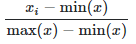


In [28]:
#Removing POA for ease of use
persona_df['POA_CODE_2016'] = persona_df['POA_CODE_2016'].str.strip('POA')

#Calculating proportion of the population
persona_df.iloc[:,2:]=persona_df.iloc[:,1:].div(persona_df["Total Population"],axis=0)

#Assign a score from 0 to 1 based on each attribute
for i in persona_df.columns[1:]:
    persona_df[i]=(persona_df[i]-persona_df[i].min())/(persona_df[i].max()-persona_df[i].min())

### Combining the Attribute scores to create our Personas

Combining scores of each attribute to create our "Personas". This will allow us to compare postcodes in order to identify where a large propotion of **each** of our persona's reside

In [29]:
# Creating persona 1 score 15-24 year old
## Under the Median Income
## Potentially in a house hold with less than 1 car but have a couple siblings

persona_df["Youth Score"]=persona_df.loc[:,["Number of 15-24 Year Olds",
                                                    "Number of households with 1 or less cars",
                                                    "Number of Households with more than 3 people",
                                                    "Number of people under Median income"]].mean(axis=1)

#Creating persona 2 score Senior Citizen
# Aged 55 +
# Still working, but may favour going to work in a taxi (traditional way of thinking)

persona_df["Senior's Score"]=persona_df.loc[:,["Number of people aged 55+",
                                                       "Number of people who travel to work ONLY by Taxi"]].mean(axis=1)

#Creating Persona 3 Indigenous Australians
# Low population density
# Under median income
# No Car Ownership or limited car ownership

persona_df["Indigenous Score"]=persona_df.loc[:,["Total Indigenous Population",
                                                         "Number of households with 1 or less cars",
                                                         "Number of people under Median income",
                                                         "Total Population"]].mean(axis=1)

#Creating Persona 4: Disabled Person
# 14+ in age and disabled
# Under median income

persona_df["Disabled Score"]=persona_df.loc[:,["Number of people aged 14 and old with a disability",
                                                       "Number of people under Median income"]].mean(axis=1)


### Combining the Persona Scores to form the equal weighted one

Combining the score for **each** persona into one (equally weighted) averaged score. This score will tell us which postcodes have a high proportion of **four** customer segments.

A **higher** score signifes a **higher propotion**, where a **lower** score signifes a **smaller** proportion

In [30]:
persona_df['Equal Weighted Score'] = persona_df.loc[:,"Youth Score":"Disabled Score"].mean(axis = 1)
#persona_df

### Preparing the data for JS leaflet

* Reordering the columns for easier manipulation in leaflet
* Changing postcodes to a "string object" so that leading zeroes will not be removed when we export the CSV

In [32]:
cols = persona_df.columns.tolist()

In [33]:
#Reordering the columns 
cols = persona_df.columns.tolist()
cols = [cols[0]] + [cols[-1]] + cols[-2:0:-1] 
persona_df=persona_df[cols]

#Changing Postcodes to "string" object, such that the leading zeroes will not be removed in the CSV
persona_df["POA_CODE_2016"] = persona_df["POA_CODE_2016"].astype("str")

# persona_df

In [34]:
persona_df

,POA_CODE_2016,Equal Weighted Score,Disabled Score,Indigenous Score,Senior's Score,Youth Score,Number of people under Median income,Number of Households with more than 3 people,Number of households with 1 or less cars,Number of people aged 14 and old with a disability,Number of people aged 55+,Number Of Immigrants arrived since 2011,Number of 15-24 Year Olds,Number of people who travel to work ONLY by Taxi,Total Indigenous Population,Single Parent Families with Children under 15,Total Population
0,2000,0.257785,0.105455,0.261561,0.283073,0.381052,0.175887,0.512887,0.611579,0.035022,0.156315,0.670035,0.223853,0.409831,0.002010,0.055036,0.256769
1,2006,0.096982,0.003574,0.008209,0.136874,0.239271,0.000000,0.000000,0.006764,0.007149,0.021214,0.184935,0.950321,0.252534,0.014306,0.000000,0.011767
2,2007,0.236443,0.091295,0.211170,0.230558,0.412749,0.150367,0.487076,0.604650,0.032222,0.101659,0.784944,0.408903,0.359457,0.006828,0.060561,0.082835
3,2008,0.241676,0.091509,0.247887,0.203420,0.423888,0.153304,0.408347,0.721857,0.029713,0.090131,0.739469,0.412042,0.316709,0.006694,0.045736,0.109694
4,2009,0.305289,0.094494,0.246632,0.506225,0.373807,0.143097,0.520677,0.713333,0.045891,0.234949,0.386613,0.118120,0.777501,0.010088,0.127977,0.120009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,2899,0.247614,0.241562,0.176543,0.263022,0.309331,0.375000,0.488487,0.309367,0.108124,0.526045,0.087052,0.064470,0.000000,0.005455,0.218887,0.016348
2666,6798,0.141786,0.063755,0.071874,0.237729,0.193788,0.072165,0.409489,0.192918,0.055345,0.302946,0.079580,0.100578,0.172512,0.005174,0.094905,0.017238
2667,6799,0.225068,0.235754,0.141856,0.198722,0.323942,0.366728,0.657973,0.183942,0.104779,0.397444,0.010110,0.087123,0.000000,0.011685,0.100476,0.005068
2668,9494,0.114518,0.064838,0.126583,0.230204,0.036446,0.000000,0.000000,0.000000,0.129676,0.366582,0.178050,0.145784,0.093825,0.083080,0.000000,0.423254


In [36]:
persona_df.sort_values(by = "Disabled Score")

,POA_CODE_2016,Equal Weighted Score,Disabled Score,Indigenous Score,Senior's Score,Youth Score,Number of people under Median income,Number of Households with more than 3 people,Number of households with 1 or less cars,Number of people aged 14 and old with a disability,Number of people aged 55+,Number Of Immigrants arrived since 2011,Number of 15-24 Year Olds,Number of people who travel to work ONLY by Taxi,Total Indigenous Population,Single Parent Families with Children under 15,Total Population
2357,6427,0.026958,0.000000,0.011484,0.087945,0.008403,0.000000,0.000000,0.000000,0.000000,0.175890,0.156028,0.033613,0.0,0.045084,0.000000,0.000853
2228,6182,0.000002,0.000000,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000037
660,3045,0.038812,0.000000,0.000237,0.091718,0.063294,0.000000,0.000000,0.000000,0.000000,0.183436,0.000000,0.253177,0.0,0.000000,0.000000,0.000946
2254,6243,0.122240,0.000000,0.038143,0.249822,0.200995,0.000000,0.539062,0.152074,0.000000,0.499644,0.000000,0.112845,0.0,0.000000,0.000000,0.000497
260,2331,0.056176,0.000000,0.014025,0.005980,0.204700,0.000000,0.000000,0.000000,0.000000,0.011961,0.017241,0.818802,0.0,0.053140,0.000000,0.002960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,3520,0.380353,0.540278,0.250492,0.363882,0.366761,0.580556,0.455208,0.390323,0.500000,0.727764,0.000000,0.040958,0.0,0.029430,0.364394,0.001658
1121,3708,0.357620,0.545833,0.224663,0.381546,0.278436,0.791667,0.215625,0.106452,0.300000,0.763092,0.000000,0.000000,0.0,0.000000,0.000000,0.000534
1609,4580,0.414098,0.547474,0.329221,0.374456,0.405241,0.750615,0.331459,0.475640,0.344333,0.748912,0.012776,0.063249,0.0,0.044950,0.259908,0.045680
2033,5521,0.392615,0.553209,0.306997,0.249208,0.461046,0.802365,0.553632,0.402790,0.304054,0.498416,0.000000,0.085396,0.0,0.021476,0.221591,0.001358


## Step 4: Export, Visualise and Communicate

In [36]:
persona_df.to_csv('persona_tables.csv', index=False, float_format = '%.8f')

In [36]:
persona_df.to_csv('web/static/postcodes-data/persona_tables.csv', index=False)